In [1]:
#Loading Libraries
import numpy as np
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn import metrics
from imblearn import metrics as imetrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from numpy import mean
from numpy import std

Using TensorFlow backend.


In [2]:
#Loading Dataset
dataset = pd.read_csv('preparedData.csv', dtype='str')
dataset.drop(['PUBCSNUM','REG'] , axis =1)

,MAR_STAT,RACE1V,AGE_DX,YEAR_DX,PRIMSITE,HISTO3V,BEHO3V,GRADE,EOD10_PN,EOD10_NE,SURGPRIF,HST_STGA,ERSTATUS,PRSTATUS,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,ADJAJCCSTG,TUMOR_SIZE,SURV
0,2,01,60.0,1992,C505,8500,3,NaN,0.0,15.0,NaN,1,1,1,10,00,00,10,8.0,Alive
1,5,01,76.0,1996,C509,8500,3,2,0.0,0.0,NaN,1,1,1,10,00,00,10,20.0,Alive
2,5,01,70.0,1994,C508,8500,3,3,0.0,0.0,NaN,1,NaN,NaN,10,00,00,10,12.0,Alive
3,5,01,65.0,2011,C504,8230,2,2,0.0,3.0,20,0,1,1,00,00,00,00,5.0,Alive
4,2,01,78.0,2005,C501,8500,2,1,0.0,0.0,20,0,1,1,00,00,00,00,8.0,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458115,1,02,48.0,2005,C504,8575,3,3,0.0,9.0,51,1,2,2,30,00,00,30,70.0,Alive
1458116,1,02,40.0,2005,C509,8500,3,NaN,0.0,0.0,50,1,NaN,NaN,NaN,NaN,00,NaN,NaN,Alive
1458117,5,01,77.0,2005,C509,8500,3,NaN,0.0,0.0,22,1,1,1,10,00,00,10,6.0,Alive
1458118,2,02,44.0,2005,C504,8500,3,3,5.0,22.0,22,2,1,1,NaN,20,00,50,NaN,Alive


In [3]:
# Filtering data (1991 - 2015) 
dataset['YEAR_DX'] = dataset["YEAR_DX"].astype('float')
mask = (dataset['YEAR_DX'] > 1990) & (dataset['YEAR_DX'] <= 2015)
dataset = dataset.loc[mask]

In [4]:
# Changing datatypes of continous columns
dataset['EOD10_NE'] = dataset['EOD10_NE'].astype('float')
dataset['EOD10_PN'] = dataset['EOD10_PN'].astype('float')
dataset['TUMOR_SIZE'] = dataset['TUMOR_SIZE'].astype('float')
dataset['AGE_DX'] = dataset['AGE_DX'].astype('float')

In [5]:
# Inspecting the values in the target variable
dataset['SURV'].unique()

array(['Alive', 'Dead', nan], dtype=object)

# Missing values Imputation

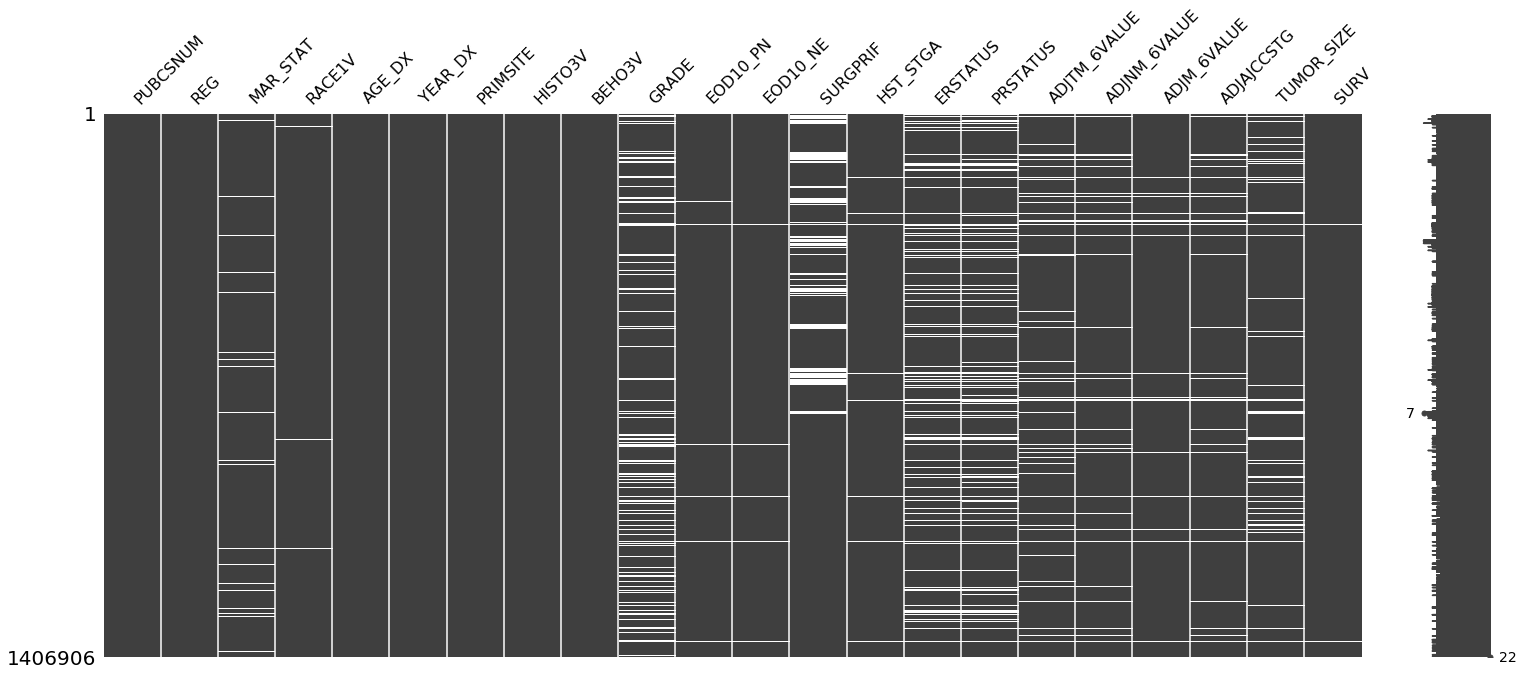

In [6]:
msno.matrix(dataset)

In [7]:
# Missing values count in each column
dataset.isnull().sum()

PUBCSNUM             0
REG                  0
MAR_STAT         68050
RACE1V            5770
AGE_DX              93
YEAR_DX              0
PRIMSITE             0
HISTO3V              0
BEHO3V               0
GRADE           212109
EOD10_PN         24000
EOD10_NE         18922
SURGPRIF        182170
HST_STGA         29775
ERSTATUS        253376
PRSTATUS        275216
ADJTM_6VALUE    143948
ADJNM_6VALUE    103153
ADJM_6VALUE      38973
ADJAJCCSTG       86653
TUMOR_SIZE      157141
SURV              4023
dtype: int64

In [8]:
#Calculation of null values percentage
def nullPercent(dataset):
    for i in dataset.columns:
        print(i +": "+ str((dataset[i].isna().sum()/dataset.shape[0])*100))
nullPercent(dataset)

PUBCSNUM: 0.0
REG: 0.0
MAR_STAT: 4.836854772102757
RACE1V: 0.4101197947837311
AGE_DX: 0.0066102497252837076
YEAR_DX: 0.0
PRIMSITE: 0.0
HISTO3V: 0.0
BEHO3V: 0.0
GRADE: 15.076273752475288
EOD10_PN: 1.7058708968474083
EOD10_NE: 1.344937046256111
SURGPRIF: 12.948270886612184
HST_STGA: 2.116346081401316
ERSTATUS: 18.00944768165037
PRSTATUS: 19.561790197781516
ADJTM_6VALUE: 10.231529327474615
ADJNM_6VALUE: 7.331904192604196
ADJM_6VALUE: 2.770121102618085
ADJAJCCSTG: 6.159117951021603
TUMOR_SIZE: 11.169260775062442
SURV: 0.28594660908404684


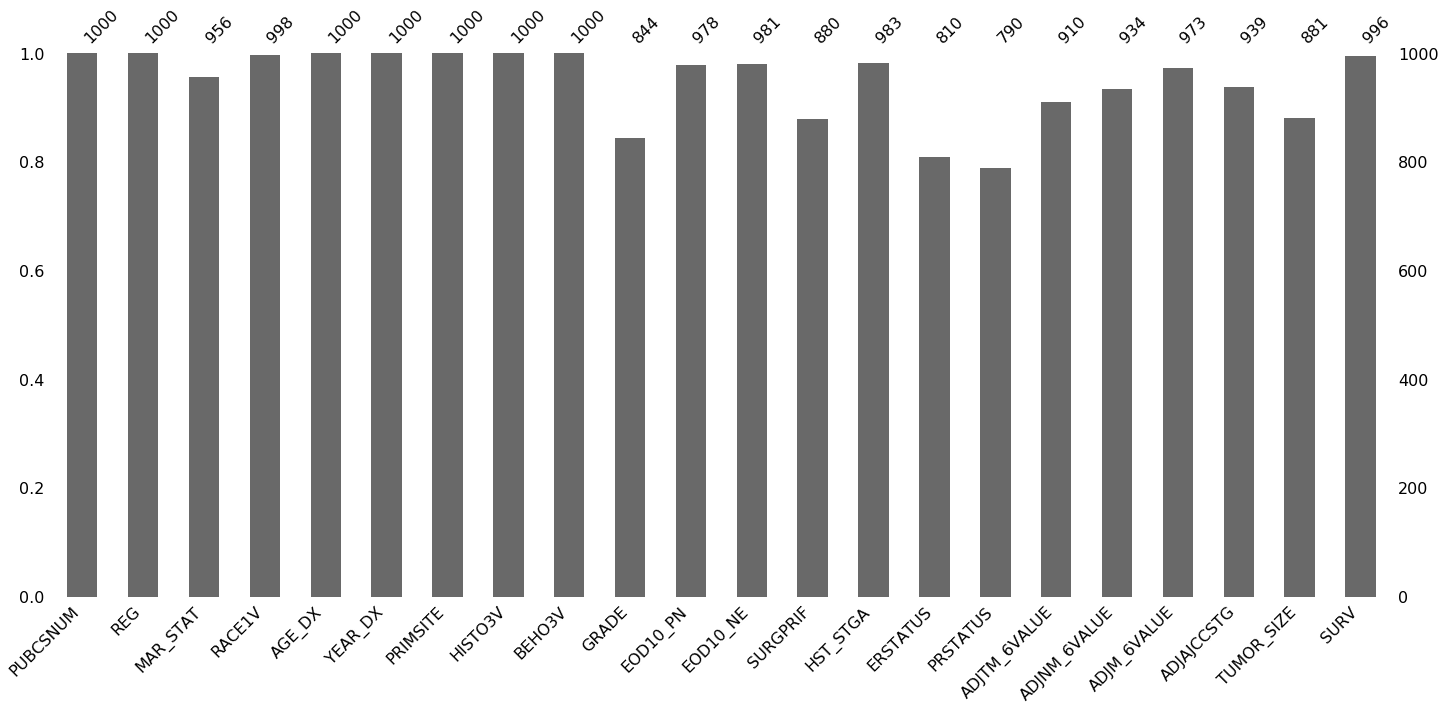

In [9]:
# Count of non missing values in sample of 1000 records
msno.bar(dataset.sample(1000))

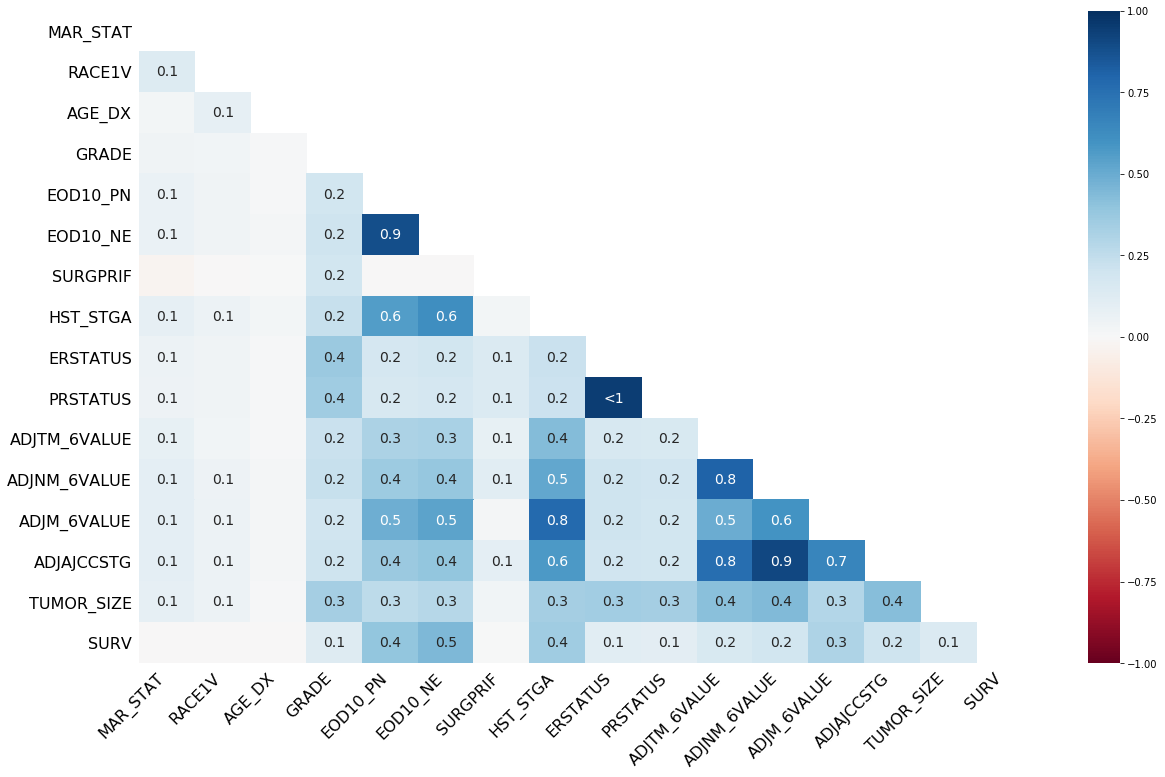

In [10]:
# Analysis of correlation among missing values
msno.heatmap(dataset)

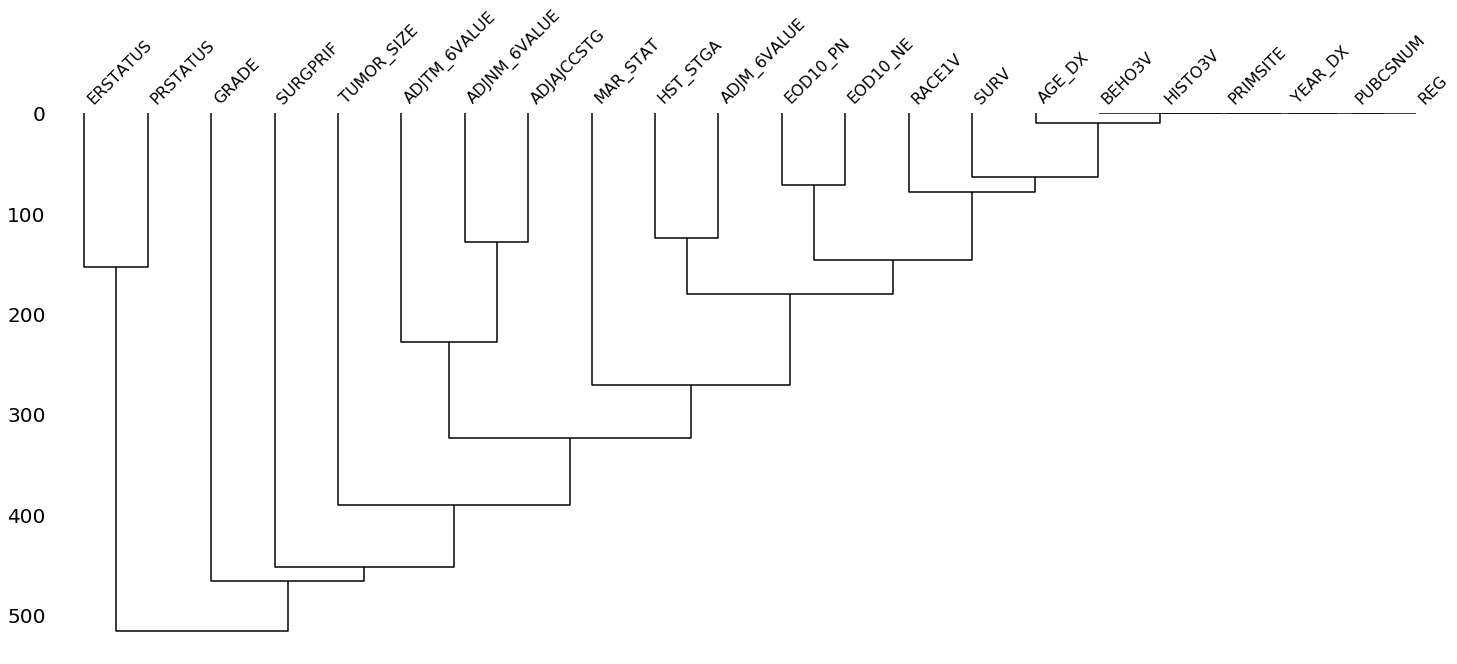

In [11]:
msno.dendrogram(dataset)

In [12]:
# Dropping all the records with null values in target variable
dataset = dataset[dataset['SURV'].notna()]

In [13]:
# Encoding Target Variable
dataset['SURV'] = dataset['SURV'].replace(['Alive','Dead'],['0','1'])
dataset['SURV'] = dataset["SURV"].astype('int')

In [14]:
# Imputing AGE column with median
dataset['AGE_DX'].fillna(dataset['AGE_DX'].median(), inplace=True)

In [15]:
# Inspecting the distribution of target variable w.r.t to the missing Tumor size
dataset.groupby(dataset['TUMOR_SIZE'].isnull())['SURV'].mean()

TUMOR_SIZE
False    0.079755
True     0.146578
Name: SURV, dtype: float64

In [16]:
dataset.groupby('TUMOR_SIZE')['SURV'].mean().loc[(dataset.groupby('TUMOR_SIZE')['SURV'].mean()>0.14)]

TUMOR_SIZE
33.0     0.140641
34.0     0.145325
35.0     0.153372
37.0     0.153459
38.0     0.161465
           ...   
950.0    0.166667
959.0    1.000000
988.0    0.222222
989.0    0.357798
998.0    0.581006
Name: SURV, Length: 210, dtype: float64

In [17]:
# Imputing Tumor size with mean
dataset['TUMOR_SIZE'].fillna(dataset['TUMOR_SIZE'].mean(), inplace=True)

In [18]:
# Inspecting the distribution of target variable w.r.t to the missing EOD10_PN
dataset.groupby(dataset['EOD10_PN'].isnull())['SURV'].mean()

EOD10_PN
False    0.083909
True     0.303674
Name: SURV, dtype: float64

In [19]:
dataset.groupby('EOD10_PN')['SURV'].mean().sort_values().head(20)

EOD10_PN
79.0    0.000000
70.0    0.000000
69.0    0.000000
63.0    0.000000
87.0    0.000000
0.0     0.065484
1.0     0.082447
2.0     0.101181
3.0     0.137792
4.0     0.166742
5.0     0.191365
61.0    0.200000
46.0    0.214286
6.0     0.222845
7.0     0.240719
8.0     0.259937
9.0     0.278100
10.0    0.300038
11.0    0.307570
12.0    0.323838
Name: SURV, dtype: float64

In [20]:
# Imputing missing EOD10_PN with 10
dataset['EOD10_PN'].fillna(10, inplace=True)

In [21]:
# Inspecting the distribution of target variable w.r.t to the missing EOD10_NE
dataset.groupby(dataset['EOD10_NE'].isnull())['SURV'].mean()

EOD10_NE
False    0.084885
True     0.287524
Name: SURV, dtype: float64

In [22]:
dataset.groupby('EOD10_NE')['SURV'].mean().loc[(dataset.groupby('EOD10_NE')['SURV'].mean()>0.2)].sort_values()

EOD10_NE
66.0    0.222222
60.0    0.227273
51.0    0.239130
77.0    0.250000
64.0    0.250000
49.0    0.250000
88.0    0.250000
57.0    0.250000
50.0    0.269841
55.0    0.285714
58.0    0.294118
72.0    0.333333
56.0    0.333333
81.0    0.333333
65.0    0.333333
62.0    0.428571
86.0    0.500000
68.0    0.500000
74.0    0.500000
71.0    0.500000
67.0    1.000000
76.0    1.000000
82.0    1.000000
83.0    1.000000
Name: SURV, dtype: float64

In [23]:
# Imputing missing EOD10_NE with 55
dataset['EOD10_NE'].fillna(55, inplace=True)

In [24]:
# Inspecting the distribution of target variable w.r.t to the missing MAR_STAT
dataset.groupby(dataset['MAR_STAT'].isnull())['SURV'].mean()

MAR_STAT
False    0.086528
True     0.097352
Name: SURV, dtype: float64

In [25]:
#Imputing missing MAR_STAT with  4
dataset['MAR_STAT'].fillna('4', inplace=True)

In [26]:
# Inspecting the distribution of target variable w.r.t to the missing Race
dataset.groupby(dataset['RACE1V'].isnull())['SURV'].mean()

RACE1V
False    0.087352
True     0.014231
Name: SURV, dtype: float64

In [27]:
#Imputing Missing Race with 98
dataset['RACE1V'].fillna('98', inplace=True)

In [28]:
# Inspecting the distribution of target variable w.r.t to the missing SURGPRIF
dataset.groupby(dataset['SURGPRIF'].isnull())['SURV'].mean()

SURGPRIF
False    0.082482
True     0.117774
Name: SURV, dtype: float64

In [29]:
# Distribution of target variable w.r.t Surgery Code
dataset.groupby('SURGPRIF')['SURV'].mean().sort_values()

SURGPRIF
30    0.015981
49    0.017369
75    0.018034
45    0.019743
47    0.019929
48    0.022653
23    0.024015
46    0.024146
44    0.026084
43    0.029671
20    0.035841
22    0.037431
24    0.038049
21    0.039134
42    0.040430
63    0.044602
59    0.055841
58    0.057833
69    0.058824
41    0.063650
67    0.065574
57    0.066961
55    0.068581
40    0.068882
56    0.076762
53    0.080535
54    0.086723
66    0.087912
64    0.097826
68    0.099099
74    0.099237
73    0.103448
72    0.108333
52    0.114000
76    0.133929
50    0.136847
90    0.138090
51    0.138566
62    0.139963
19    0.148936
65    0.165746
60    0.190184
80    0.192714
70    0.200000
61    0.217940
99    0.255493
71    0.303371
00    0.381657
Name: SURV, dtype: float64

In [30]:
# Imputing missing Surgery with 52
dataset['SURGPRIF'].fillna('52', inplace=True)

In [31]:
# Inspecting the distribution of target variable w.r.t to the missing PRSTATUS
dataset.groupby(dataset['PRSTATUS'].isnull())['SURV'].mean()

PRSTATUS
False    0.084303
True     0.098520
Name: SURV, dtype: float64

In [32]:
# Distribution of PRSTATUS W.R.T PRSTATUS
dataset.groupby('PRSTATUS')['SURV'].mean()

PRSTATUS
1    0.055381
2    0.149143
3    0.127288
Name: SURV, dtype: float64

In [33]:
# Imputing Missing ERStatus with 99
dataset['ERSTATUS'] = dataset['ERSTATUS'].replace(np.nan, '99')

In [34]:
# Imuting Missing PRSTATUS with 99
dataset['PRSTATUS'] = dataset['PRSTATUS'].replace(np.nan, '99')

In [35]:
# Printing percentage of Null Values in columns
nullPercent(dataset)

PUBCSNUM: 0.0
REG: 0.0
MAR_STAT: 0.0
RACE1V: 0.0
AGE_DX: 0.0
YEAR_DX: 0.0
PRIMSITE: 0.0
HISTO3V: 0.0
BEHO3V: 0.0
GRADE: 14.833596244305477
EOD10_PN: 0.0
EOD10_NE: 0.0
SURGPRIF: 0.0
HST_STGA: 1.8425627796473405
ERSTATUS: 0.0
PRSTATUS: 0.0
ADJTM_6VALUE: 9.975814091410331
ADJNM_6VALUE: 7.070012253338303
ADJM_6VALUE: 2.497784918628282
ADJAJCCSTG: 5.896001305882244
TUMOR_SIZE: 0.0
SURV: 0.0


In [36]:
#Dropping Patient ID, Register Num and year of Diagnosis Columns. 
dataset = dataset.drop(['PUBCSNUM','REG','YEAR_DX'],axis=1)
dataset

,MAR_STAT,RACE1V,AGE_DX,PRIMSITE,HISTO3V,BEHO3V,GRADE,EOD10_PN,EOD10_NE,SURGPRIF,HST_STGA,ERSTATUS,PRSTATUS,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,ADJAJCCSTG,TUMOR_SIZE,SURV
0,2,01,60.0,C505,8500,3,NaN,0.0,15.0,52,1,1,1,10,00,00,10,8.00000,0
1,5,01,76.0,C509,8500,3,2,0.0,0.0,52,1,1,1,10,00,00,10,20.00000,0
2,5,01,70.0,C508,8500,3,3,0.0,0.0,52,1,99,99,10,00,00,10,12.00000,0
3,5,01,65.0,C504,8230,2,2,0.0,3.0,20,0,1,1,00,00,00,00,5.00000,0
4,2,01,78.0,C501,8500,2,1,0.0,0.0,20,0,1,1,00,00,00,00,8.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458115,1,02,48.0,C504,8575,3,3,0.0,9.0,51,1,2,2,30,00,00,30,70.00000,0
1458116,1,02,40.0,C509,8500,3,NaN,0.0,0.0,50,1,99,99,NaN,NaN,00,NaN,26.52358,0
1458117,5,01,77.0,C509,8500,3,NaN,0.0,0.0,22,1,1,1,10,00,00,10,6.00000,0
1458118,2,02,44.0,C504,8500,3,3,5.0,22.0,22,2,1,1,NaN,20,00,50,26.52358,0


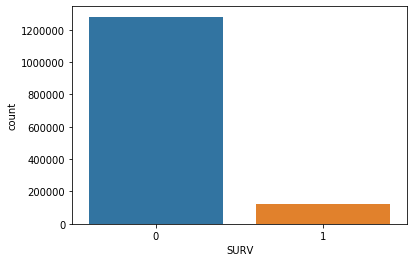

In [37]:
# Distribution of Target Variable
sns.countplot(dataset['SURV'], label = "Count") 

## Analysis of Continous Variables

<function matplotlib.pyplot.show(*args, **kw)>

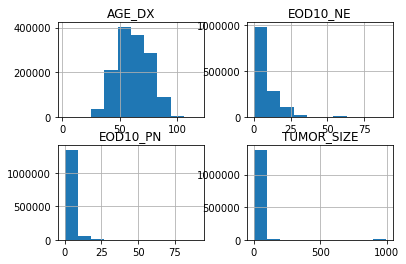

In [38]:
# Distribution of Continous variables
dataset['SURV'] = dataset["SURV"].astype(str)
dataset.hist()
plt.show

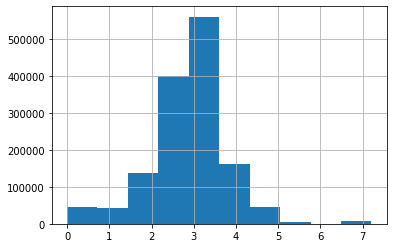

In [39]:
# Box-cox transformation on Tumor Size
dataset['TUMOR_SIZE'],fitted_lambda_TUMOR_SIZE = stats.boxcox((dataset['TUMOR_SIZE']+1))
dataset['TUMOR_SIZE'].hist()

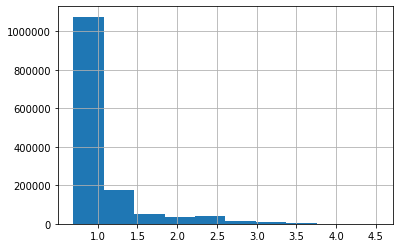

In [40]:
# Log transformation on EOD10_PN
dataset['EOD10_PN'] = (dataset['EOD10_PN']+2).transform(np.log)
dataset['EOD10_PN'].hist()

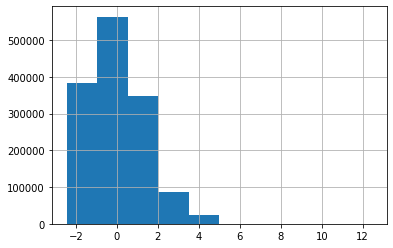

In [41]:
# Quantile transformation followed by Yeojohnson transformation on EOD10_NE variable
quantile_transformer = preprocessing.QuantileTransformer(random_state=0,output_distribution='normal')
dataset['EOD10_NE']=quantile_transformer.fit_transform(np.reshape(dataset['EOD10_NE'].array,(-1,1)))
dataset['EOD10_NE'],fitted_lambda_EOD10_NE = stats.yeojohnson(dataset['EOD10_NE'])
dataset['EOD10_NE'].hist()

In [42]:
# Preparing data for Visulizations
data_dia = dataset.SURV
conti_cols = ['AGE_DX','EOD10_NE','EOD10_PN','TUMOR_SIZE']
data = dataset.drop(list(set(list(dataset)) - set(conti_cols)), axis=1)
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([data_dia,data_n_2.iloc[:,:]],axis=1)
data = pd.melt(data,id_vars="SURV",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

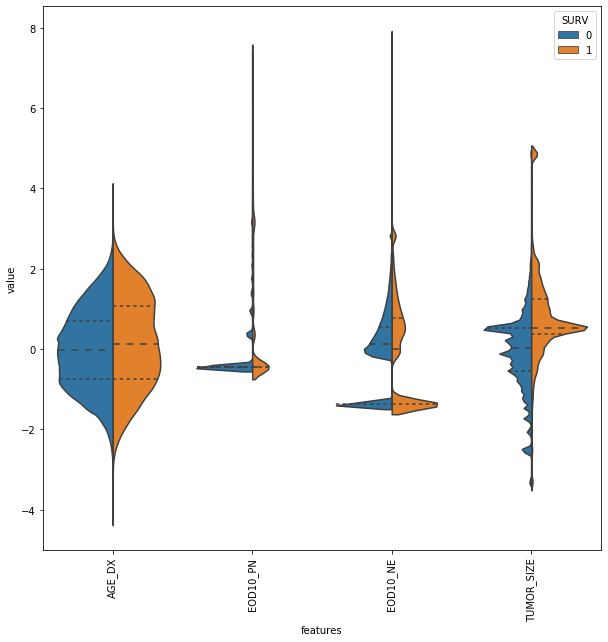

In [43]:
# Violin plos for continous variables
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="SURV", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

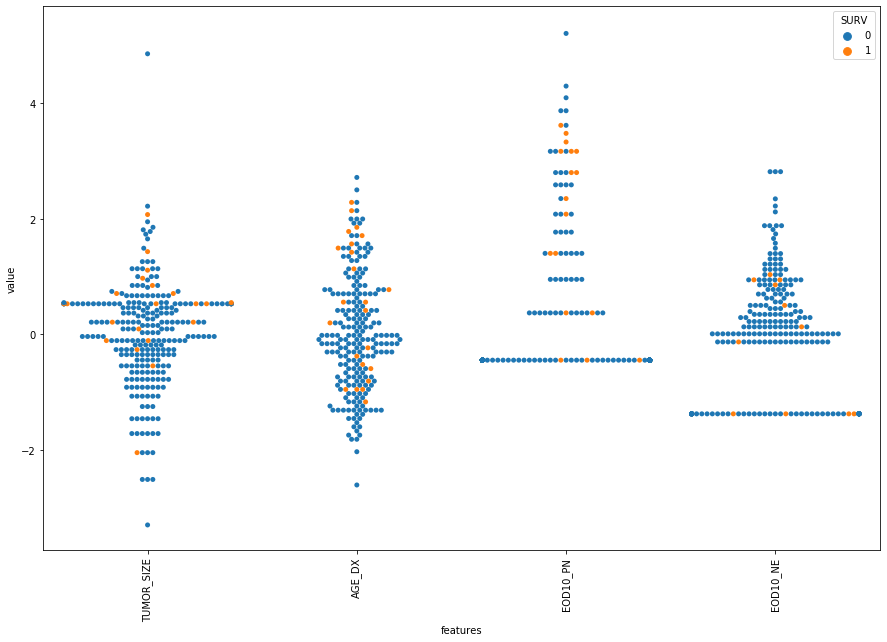

In [44]:
# Swarm plots for a sample of 1000 records 
plt.figure(figsize=(15,10))
sns.swarmplot(x="features", y="value", hue="SURV", data=data.sample(1000))
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

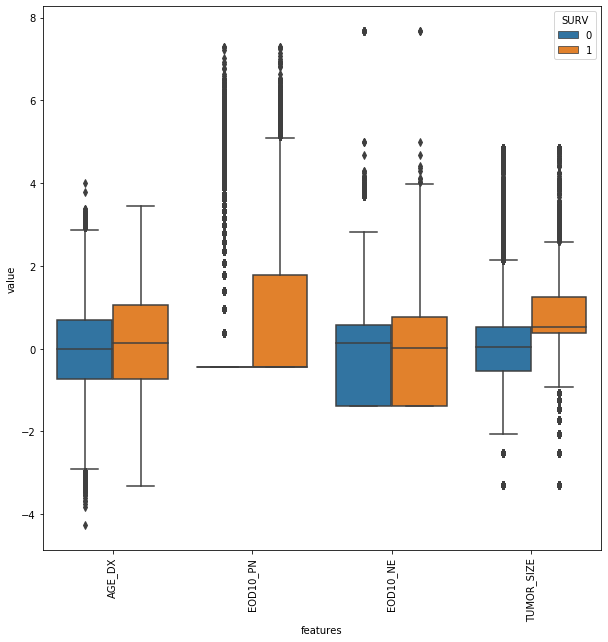

In [45]:
# Box plots 
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="SURV", data=data)
plt.xticks(rotation=90)

### ANOVA for selecting k best continous features

In [46]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Considering only continous features
X = dataset.drop(list(set(list(dataset)) - set(conti_cols)), axis=1)
y = dataset['SURV'].replace(['Alive','Dead'],['1','0'])

# define feature selection
fs = SelectKBest(score_func=f_classif, k='all')

# apply feature selection
X_selected = fs.fit_transform(X, y)

#selected_features = pd.DataFrame(fs.inverse_transform(X_selected), index=X.index,columns=X.columns)

# Printing Scores
print('Score list:', fs.scores_)
print('Feature list:', X.columns)

Score list: [ 2975.75700155 62591.91741764  1189.28661254 90333.07004701]
Feature list: Index(['AGE_DX', 'EOD10_PN', 'EOD10_NE', 'TUMOR_SIZE'], dtype='object')


# Analysis of Categorical Variables

In [47]:
# Encoding for Ordinal Columns - [HST_STGA,ADJNM_6VALUE,ADJTM_6VALUE,ADJAJCCSTG,ADJM_6VALUE,GRADE]
dataset['HST_STGA'] = dataset['HST_STGA'].replace(['0','1','2','4'],['1','2','3','4'])
dataset['ADJNM_6VALUE'] = dataset['ADJNM_6VALUE'].replace(['00','10','20','30'],['1','2','3','4'])
dataset['ADJTM_6VALUE'] = dataset['ADJTM_6VALUE'].replace(['00','10','20','30','40','44','60'],['1','2','3','4','5','5',np.nan])
dataset['ADJAJCCSTG'] = dataset['ADJAJCCSTG'].replace(['00','10','30','50','70'],['1','2','3','4','5'])
dataset['ADJM_6VALUE'] = dataset['ADJM_6VALUE'].replace(['00','10'],['0','1'])

# Changing the datatypes of ordinal Columns
dataset['ADJAJCCSTG'] = dataset['ADJAJCCSTG'].astype('float')
dataset['HST_STGA'] = dataset['HST_STGA'].astype('float')
dataset['ADJTM_6VALUE'] = dataset['ADJTM_6VALUE'].astype('float')
dataset['ADJNM_6VALUE'] = dataset['ADJNM_6VALUE'].astype('float')
dataset['GRADE'] = dataset['GRADE'].astype('float')
dataset['ADJM_6VALUE'] = dataset['ADJM_6VALUE'].astype('float')

In [48]:
# Preparation of Visulization
data_dia = dataset.SURV
ordinal_cols = ['HST_STGA','ADJTM_6VALUE','ADJNM_6VALUE','GRADE','ADJAJCCSTG','ADJM_6VALUE']
data = dataset.drop(list(set(list(dataset)) - set(ordinal_cols)), axis=1)
data = pd.concat([data_dia,data.iloc[:,:]],axis=1)
data = pd.melt(data,id_vars="SURV",
                    var_name="features",
                    value_name='value')

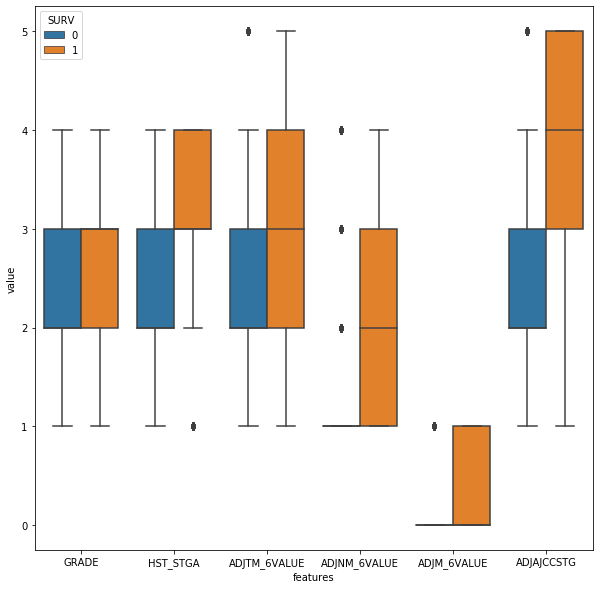

In [49]:
# Box plots for ordinal columns
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="SURV", data=data)

### Nominal Variables

In [50]:
# Canging datatypes.
dataset['SURV'] = dataset["SURV"].astype(str)
dataset['SURGPRIF'] = dataset["SURGPRIF"].astype(str)

In [51]:
# Percentage of occourance of each level in PRIMSITE
dataset['PRIMSITE'].value_counts()/dataset['PRIMSITE'].count() * 100

C504    32.629307
C508    20.705077
C509    17.557273
C502     9.953360
C505     6.633982
C501     5.780454
C503     5.401377
C500     0.761361
C506     0.577810
Name: PRIMSITE, dtype: float64

In [52]:
# Grouping levels w.r.t target variable distribution 
tbl = pd.crosstab(dataset.SURV, dataset.PRIMSITE) 
propTbl = tbl / tbl.sum() 
propTbl.round(2).transpose().reset_index().groupby('0')['PRIMSITE'].apply(lambda x: ','.join(set(x.dropna()))).reset_index()

,0,PRIMSITE
0,0.84,C509
1,0.88,C506
2,0.91,C501
3,0.92,"C508,C500"
4,0.93,"C504,C505"
5,0.94,"C502,C503"


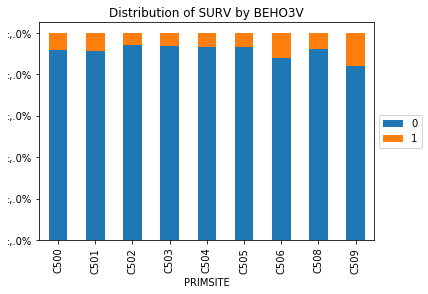

In [53]:
# Visulizing the distribution of each level
ax = propTbl.transpose().plot(kind='bar', stacked=True) 
ax.set_yticklabels([':,.0%'.format(x) for x in ax.get_yticks()]) 
plt.title('Distribution of SURV by BEHO3V') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show()

In [54]:
#Function to group levels with equally distributed target value. 
def groupLevels(colname):
    tbl = pd.crosstab(dataset.SURV, dataset[colname]) 
    propTbl = tbl / tbl.sum() 
    groups = propTbl.round(2).transpose().reset_index().groupby('0')[colname].apply(list)
    for i in groups:
        dataset[colname] = dataset[colname].replace(i,i[0])

# Grouping levels of all nominal variables
groupLevels('PRIMSITE')
groupLevels('HISTO3V')
groupLevels('SURGPRIF')
groupLevels('ERSTATUS')
groupLevels('PRSTATUS')

In [55]:
# Function to print distribution percentage of levels
def classPercentage(colname):
    print(dataset[colname].value_counts()/dataset[colname].count() *100)

# Printing distribution percentage of PRIMESITE
classPercentage('PRIMSITE')

C504    39.263289
C500    21.466437
C509    17.557273
C502    15.354737
C501     5.780454
C506     0.577810
Name: PRIMSITE, dtype: float64


In [56]:
# Function to print the levels according to target variable distribution 
def classgroups(colname):
    tbl = pd.crosstab(dataset.SURV, dataset[colname]) 
    propTbl = tbl / tbl.sum() 
    print(propTbl.round(3).transpose().reset_index().groupby('0')[colname].apply(lambda x: ','.join(set(x.dropna()))).reset_index())

# Print class groups of PRIMSITE variable
classgroups('PRIMSITE')

       0 PRIMSITE
0  0.841     C509
1  0.880     C506
2  0.910     C501
3  0.920     C500
4  0.932     C504
5  0.940     C502


In [57]:
# Further reducing levels according to target variable distribution
dataset['PRIMSITE'] = dataset['PRIMSITE'].replace('C506','C509')
dataset['PRIMSITE'] = dataset['PRIMSITE'].replace('C501','C500')

# Printing percentage distribution of each level
classPercentage('PRIMSITE')

C504    39.263289
C500    27.246891
C509    18.135083
C502    15.354737
Name: PRIMSITE, dtype: float64


In [58]:
# Printing percentage distribution of each level in HISTO3V
classPercentage('HISTO3V')

8255    64.293102
8520    15.347110
8343     7.408316
8050     4.516414
8201     3.419387
8003     2.267473
8000     0.662279
8530     0.540744
8323     0.423129
8574     0.240148
8005     0.237154
8521     0.091597
8070     0.075915
8430     0.048044
8020     0.046618
8012     0.042983
8035     0.042270
8141     0.035926
8513     0.029796
8246     0.025947
8570     0.024949
8022     0.021171
8560     0.018676
8011     0.018533
8032     0.018319
8800     0.011761
8310     0.010621
8046     0.010478
8512     0.009979
8001     0.009409
8033     0.008340
8021     0.006986
8071     0.006415
8571     0.006130
8240     0.005845
8830     0.005132
8982     0.004134
8072     0.003422
8074     0.002637
8031     0.000784
8015     0.000570
9220     0.000499
8350     0.000499
8804     0.000356
Name: HISTO3V, dtype: float64


In [59]:
# Print class groups of HISTO3V variable
classgroups('HISTO3V')

        0 HISTO3V
0   0.000    8350
1   0.439    8530
2   0.500    8015
3   0.514    8074
4   0.551    8046
5   0.571    9220
6   0.582    8021
7   0.590    8000
8   0.600    8804
9   0.607    8033
10  0.622    8071
11  0.636    8031
12  0.667    8003
13  0.677    8012
14  0.697    8001
15  0.709    8020
16  0.724    8032
17  0.733    8800
18  0.740    8570
19  0.750    8072
20  0.762    8070
21  0.770    8574
22  0.788    8246
23  0.802    8571
24  0.809    8560
25  0.823    8141
26  0.830    8005
27  0.839    8310
28  0.854    8240
29  0.861    8830
30  0.872    8022
31  0.879    8982
32  0.887    8521
33  0.899    8430
34  0.911    8255
35  0.920    8323
36  0.929    8520
37  0.935    8513
38  0.951    8035
39  0.957    8512
40  0.970    8050
41  0.979    8343
42  0.992    8201
43  1.000    8011


In [60]:
# Further reducing levels according to target variable distribution
dataset['HISTO3V'] = dataset['HISTO3V'].replace(['8530','8015','8074','8046','9220','8021','8000'],'8530')
dataset['HISTO3V'] = dataset['HISTO3V'].replace(['8804','8033','8071','8031','8003','8012'],'8804')
dataset['HISTO3V'] = dataset['HISTO3V'].replace(['8001','8020','8032','8800','8570','8072'],'8001')
dataset['HISTO3V'] = dataset['HISTO3V'].replace(['8070','8574','8246','8571','8560','8141','8005','8310'],'8070')
dataset['HISTO3V'] = dataset['HISTO3V'].replace(['8240','8830','8022','8982','8521','8430','8255','8323','8520','8513'],'8240')
dataset['HISTO3V'] = dataset['HISTO3V'].replace(['8035','8512','8050','8343','8201'],'8035')

In [61]:
# Printing percentage distribution of each level in HISTO3V
classPercentage('HISTO3V')

# Print class groups of HISTO3V variable
classgroups('HISTO3V')

8240    80.269060
8035    15.396366
8804     2.326352
8530     1.224193
8070     0.650518
8001     0.114479
8011     0.018533
8350     0.000499
Name: HISTO3V, dtype: float64
       0 HISTO3V
0  0.000    8350
1  0.522    8530
2  0.667    8804
3  0.721    8001
4  0.797    8070
5  0.915    8240
6  0.979    8035
7  1.000    8011


In [62]:
# Printing percentage distribution of each level in SURGPRIF
classPercentage('SURGPRIF')

20    36.965592
23    14.981791
52    14.257925
50    13.122548
41     8.409326
00     6.506102
40     2.321220
43     1.449943
54     0.668980
53     0.497262
99     0.340656
60     0.291186
61     0.107279
64     0.034500
65     0.012902
72     0.008554
76     0.007984
19     0.006700
71     0.006344
70     0.003208
Name: SURGPRIF, dtype: float64


In [63]:
# Print class groups of SURGPRIF variable
classgroups('SURGPRIF')

        0 SURGPRIF
0   0.618       00
1   0.697       71
2   0.745       99
3   0.782       61
4   0.800       70
5   0.808       60
6   0.834       65
7   0.851       19
8   0.862       50
9   0.866       76
10  0.883       52
11  0.892       72
12  0.901       64
13  0.913       54
14  0.921       53
15  0.931       40
16  0.937       41
17  0.962       20
18  0.973       43
19  0.977       23


In [64]:
# Further reducing levels according to target variable distribution
dataset['SURGPRIF'] = dataset['SURGPRIF'].replace(['00','71','99','61','70','60','65'],'00')
dataset['SURGPRIF'] = dataset['SURGPRIF'].replace(['19','50','76'],'19')
dataset['SURGPRIF'] = dataset['SURGPRIF'].replace(['52','64','54'],'52')
dataset['SURGPRIF'] = dataset['SURGPRIF'].replace(['53','40','41'],'53')
dataset['SURGPRIF'] = dataset['SURGPRIF'].replace(['43','23'],'43')

In [65]:
# Printing percentage distribution of each level in SURGPRIF
classPercentage('SURGPRIF')

# Print class groups of SURGPRIF variable
classgroups('SURGPRIF')

20    36.965592
43    16.431734
52    14.961404
19    13.137232
53    11.227807
00     7.267677
72     0.008554
Name: SURGPRIF, dtype: float64
       0 SURGPRIF
0  0.635       00
1  0.862       19
2  0.884       52
3  0.892       72
4  0.935       53
5  0.962       20
6  0.977       43


In [66]:
# Printing percentage distribution of each level in PRSTATUS
classPercentage('PRSTATUS')

1     55.683546
2     24.549089
99    19.331120
3      0.436245
Name: PRSTATUS, dtype: float64


In [67]:
# Printing percentage distribution of each level in ERSTATUS
classPercentage('ERSTATUS')

1     66.020331
99    17.774326
2     16.003116
3      0.202226
Name: ERSTATUS, dtype: float64


In [68]:
# Reducing Levels in Race and Mar_Stat columns
dataset['MAR_STAT'] = dataset['MAR_STAT'].replace(['6','4','5'],['1','3','3'])
dataset['RACE1V'] = dataset['RACE1V'].replace(['05','06','08','10','11','12','13','14','15','16','17','20','21','22','96'],'04')
dataset['RACE1V'] = dataset['RACE1V'].replace(['25','26','27','28','30','31','32','97','98'],'05')
dataset['RACE1V'] = dataset['RACE1V'].replace('07','03')

In [69]:
# Printing percentage distribution of each level in Race
classPercentage('RACE1V')

01    81.219175
02    10.180607
04     6.947835
03     0.933791
05     0.718592
Name: RACE1V, dtype: float64


In [70]:
# Print class groups of RACE1V variable
classgroups('RACE1V')

       0 RACE1V
0  0.853     02
1  0.905     03
2  0.918     01
3  0.942     04
4  0.960     05


In [71]:
# Further reducing levels according to target variable distribution
dataset['RACE1V'] = dataset['RACE1V'].replace('05','04')
dataset['RACE1V'] = dataset['RACE1V'].replace('03','01')

In [72]:
# Printing percentage distribution of each level in Race
classPercentage('RACE1V')

01    82.152966
02    10.180607
04     7.666427
Name: RACE1V, dtype: float64


In [73]:
# Printing percentage distribution of each level in MAR_STAT
classPercentage('MAR_STAT')

2    54.726802
3    32.206463
1    13.066735
Name: MAR_STAT, dtype: float64


In [74]:
# Printing percentage distribution of each level in BEHO3V
classPercentage('BEHO3V')

3    81.319896
2    18.680104
Name: BEHO3V, dtype: float64


In [75]:
#Changing datatype if target variable
dataset['SURV'] = dataset['SURV'].astype('int')

In [76]:
# Getting Dummies
dataset1 = pd.get_dummies(dataset)
dataset1

,AGE_DX,GRADE,EOD10_PN,EOD10_NE,HST_STGA,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,ADJAJCCSTG,TUMOR_SIZE,...,SURGPRIF_53,SURGPRIF_72,ERSTATUS_1,ERSTATUS_2,ERSTATUS_3,ERSTATUS_99,PRSTATUS_1,PRSTATUS_2,PRSTATUS_3,PRSTATUS_99
0,60.0,NaN,0.693147,1.372144,2.0,2.0,1.0,0.0,2.0,2.227035,...,0,0,1,0,0,0,1,0,0,0
1,76.0,2.0,0.693147,-2.438238,2.0,2.0,1.0,0.0,2.0,3.101957,...,0,0,1,0,0,0,1,0,0,0
2,70.0,3.0,0.693147,-2.438238,2.0,2.0,1.0,0.0,2.0,2.605635,...,0,0,0,0,0,1,0,0,0,1
3,65.0,2.0,0.693147,0.035563,1.0,1.0,1.0,0.0,1.0,1.811550,...,0,0,1,0,0,0,1,0,0,0
4,78.0,1.0,0.693147,-2.438238,1.0,1.0,1.0,0.0,1.0,2.227035,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458115,48.0,3.0,0.693147,0.645791,2.0,4.0,1.0,0.0,3.0,4.375835,...,0,0,0,1,0,0,0,1,0,0
1458116,40.0,NaN,0.693147,-2.438238,2.0,NaN,NaN,0.0,NaN,3.383213,...,0,0,0,0,0,1,0,0,0,1
1458117,77.0,NaN,0.693147,-2.438238,2.0,2.0,1.0,0.0,2.0,1.969268,...,0,0,1,0,0,0,1,0,0,0
1458118,44.0,3.0,1.945910,2.413641,3.0,NaN,3.0,0.0,4.0,3.383213,...,0,0,1,0,0,0,1,0,0,0


#### Chi-squared statistical test for selecting k best Nominal features

In [77]:
# Defining a droplist
drop_list = conti_cols
drop_list.append('SURV')
drop_list.extend(ordinal_cols)

# Droping Continous and Ordinal features.
X = dataset1.drop(list(drop_list), axis=1)
y = dataset1['SURV'].astype('str')

# Define feature selection
fs = SelectKBest(score_func=chi2, k='all')

# apply feature selection
X_selected = fs.fit_transform(X, y)
selected_features_chi2 = pd.DataFrame(fs.scores_, index=X.columns)

# Printing Results
print('Score list:', fs.scores_)
print('Feature list:', X.columns)

Score list: [1.22791864e+03 3.72848441e+03 3.28059691e+03 3.04561531e+02
 6.43461180e+03 1.24677689e+03 1.05676841e+02 1.93376244e+03
 2.46580850e+03 1.59086829e+04 7.44190918e+02 2.47915144e+01
 1.18636036e+04 1.53919097e+03 3.71749417e+01 7.34122156e+01
 3.29579386e+04 2.49163036e+04 2.07846034e+04 4.77445947e+03
 9.92631970e+04 6.10915514e+03 1.60191163e+04 1.18385106e+04
 2.21514931e+03 9.67283221e+02 6.83878622e-01 7.63991434e+03
 2.18850804e+04 2.01289172e+02 7.06013557e+02 9.85923853e+03
 1.67068785e+04 1.24669879e+02 4.48839924e+02]
Feature list: Index(['MAR_STAT_1', 'MAR_STAT_2', 'MAR_STAT_3', 'RACE1V_01', 'RACE1V_02',
       'RACE1V_04', 'PRIMSITE_C500', 'PRIMSITE_C502', 'PRIMSITE_C504',
       'PRIMSITE_C509', 'HISTO3V_8001', 'HISTO3V_8011', 'HISTO3V_8035',
       'HISTO3V_8070', 'HISTO3V_8240', 'HISTO3V_8350', 'HISTO3V_8530',
       'HISTO3V_8804', 'BEHO3V_2', 'BEHO3V_3', 'SURGPRIF_00', 'SURGPRIF_19',
       'SURGPRIF_20', 'SURGPRIF_43', 'SURGPRIF_52', 'SURGPRIF_53',
      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

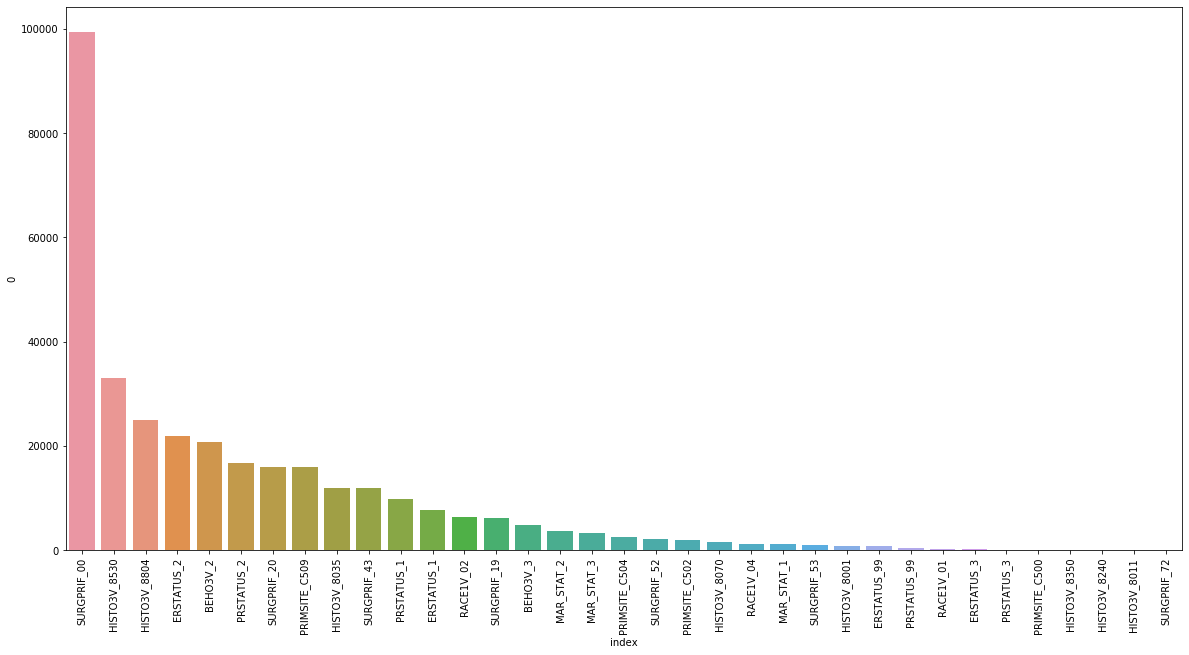

In [78]:
# Plotting Results from Chi2 test
fig = plt.figure(figsize=(20,10))
sns.barplot(x=selected_features_chi2.reset_index().sort_values(by=0,ascending= False)['index'], y= selected_features_chi2.reset_index().sort_values(by=0,ascending= False)[0])
plt.xticks(rotation=90)

### Ordinal Variables

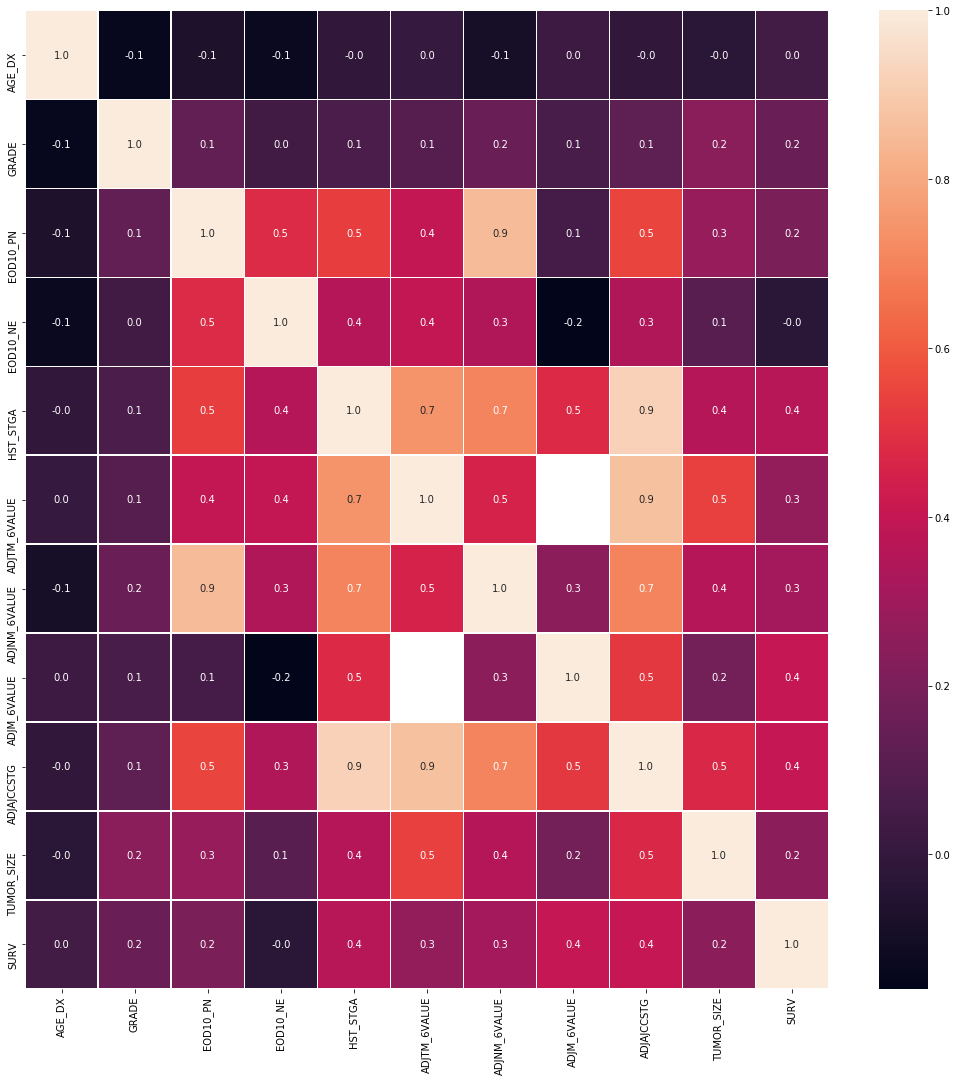

In [79]:
# Printing Correleation Matrix
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [80]:
# Inspecting the distribution of target variable w.r.t to the missing ADJAJCCSTG
dataset1.groupby(dataset['ADJAJCCSTG'].isna())['SURV'].mean()

ADJAJCCSTG
False    0.081159
True     0.181106
Name: SURV, dtype: float64

#### Iterative imputation for Missing values in 'HST_STGA','ADJTM_6VALUE','ADJNM_6VALUE','ADJM_6VALUE','ADJAJCCSTG' columns

In [81]:
# Creating a new dataset
# These colums have high correleation among themselves, one could be the best predictor for the other. So, selecting only these columns to save computation time
missset1 = dataset1.drop(list(set(list(dataset1)) - set(['EOD10_PN','HST_STGA','ADJTM_6VALUE','ADJNM_6VALUE','ADJM_6VALUE','ADJAJCCSTG','TUMOR_SIZE','SURV'])), axis=1)
missset1

,EOD10_PN,HST_STGA,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,ADJAJCCSTG,TUMOR_SIZE,SURV
0,0.693147,2.0,2.0,1.0,0.0,2.0,2.227035,0
1,0.693147,2.0,2.0,1.0,0.0,2.0,3.101957,0
2,0.693147,2.0,2.0,1.0,0.0,2.0,2.605635,0
3,0.693147,1.0,1.0,1.0,0.0,1.0,1.811550,0
4,0.693147,1.0,1.0,1.0,0.0,1.0,2.227035,0
...,...,...,...,...,...,...,...,...
1458115,0.693147,2.0,4.0,1.0,0.0,3.0,4.375835,0
1458116,0.693147,2.0,NaN,NaN,0.0,NaN,3.383213,0
1458117,0.693147,2.0,2.0,1.0,0.0,2.0,1.969268,0
1458118,1.945910,3.0,NaN,3.0,0.0,4.0,3.383213,0


In [82]:
# Fitting Iterative imputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(missset1)
missset1 = pd.DataFrame(imp.transform(missset1), columns=['EOD10_PN','HST_STGA','ADJTM_6VALUE','ADJNM_6VALUE','ADJM_6VALUE','ADJAJCCSTG','TUMOR_SIZE','SURV'])
missset1

C:\Users\narra\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,EOD10_PN,HST_STGA,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,ADJAJCCSTG,TUMOR_SIZE,SURV
0,0.693147,2.000000,2.000000,1.000000,0.00000,2.000000,2.227035,0.0
1,0.693147,2.000000,2.000000,1.000000,0.00000,2.000000,3.101957,0.0
2,0.693147,2.000000,2.000000,1.000000,0.00000,2.000000,2.605635,0.0
3,0.693147,1.000000,1.000000,1.000000,0.00000,1.000000,1.811550,0.0
4,0.693147,1.000000,1.000000,1.000000,0.00000,1.000000,2.227035,0.0
...,...,...,...,...,...,...,...,...
1402878,0.693147,2.000000,4.000000,1.000000,0.00000,3.000000,4.375835,0.0
1402879,0.693147,2.000000,2.339974,1.123008,0.00000,2.260096,3.383213,0.0
1402880,0.693147,2.000000,2.000000,1.000000,0.00000,2.000000,1.969268,0.0
1402881,1.945910,3.000000,3.208684,3.000000,0.00000,4.000000,3.383213,0.0


In [83]:
#Rounding values
missset1 = missset1.drop(['TUMOR_SIZE','SURV','EOD10_PN'], axis=1).round()

In [84]:
#Copying values to original dataset
dataset1['HST_STGA'] = missset1['HST_STGA'].values
dataset1['ADJTM_6VALUE'] = missset1['ADJTM_6VALUE'].values
dataset1['ADJNM_6VALUE'] = missset1['ADJNM_6VALUE'].values
dataset1['ADJM_6VALUE'] = missset1['ADJM_6VALUE'].values
dataset1['ADJAJCCSTG'] = missset1['ADJAJCCSTG'].values

# Changing datatype
dataset1['ADJAJCCSTG'] = dataset1['ADJAJCCSTG'].astype('int')
dataset1['HST_STGA'] = dataset1['HST_STGA'].astype('int')
dataset1['ADJTM_6VALUE'] = dataset1['ADJTM_6VALUE'].astype('int')
dataset1['ADJNM_6VALUE'] = dataset1['ADJNM_6VALUE'].astype('int')
dataset1['ADJM_6VALUE'] = dataset1['ADJM_6VALUE'].astype('int')

In [85]:
# Printing Dataset
dataset1

,AGE_DX,GRADE,EOD10_PN,EOD10_NE,HST_STGA,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,ADJAJCCSTG,TUMOR_SIZE,...,SURGPRIF_53,SURGPRIF_72,ERSTATUS_1,ERSTATUS_2,ERSTATUS_3,ERSTATUS_99,PRSTATUS_1,PRSTATUS_2,PRSTATUS_3,PRSTATUS_99
0,60.0,NaN,0.693147,1.372144,2,2,1,0,2,2.227035,...,0,0,1,0,0,0,1,0,0,0
1,76.0,2.0,0.693147,-2.438238,2,2,1,0,2,3.101957,...,0,0,1,0,0,0,1,0,0,0
2,70.0,3.0,0.693147,-2.438238,2,2,1,0,2,2.605635,...,0,0,0,0,0,1,0,0,0,1
3,65.0,2.0,0.693147,0.035563,1,1,1,0,1,1.811550,...,0,0,1,0,0,0,1,0,0,0
4,78.0,1.0,0.693147,-2.438238,1,1,1,0,1,2.227035,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458115,48.0,3.0,0.693147,0.645791,2,4,1,0,3,4.375835,...,0,0,0,1,0,0,0,1,0,0
1458116,40.0,NaN,0.693147,-2.438238,2,2,1,0,2,3.383213,...,0,0,0,0,0,1,0,0,0,1
1458117,77.0,NaN,0.693147,-2.438238,2,2,1,0,2,1.969268,...,0,0,1,0,0,0,1,0,0,0
1458118,44.0,3.0,1.945910,2.413641,3,3,3,0,4,3.383213,...,0,0,1,0,0,0,1,0,0,0


In [86]:
# Checking null percentage of columns
nullPercent(dataset1)

AGE_DX: 0.0
GRADE: 14.833596244305477
EOD10_PN: 0.0
EOD10_NE: 0.0
HST_STGA: 0.0
ADJTM_6VALUE: 0.0
ADJNM_6VALUE: 0.0
ADJM_6VALUE: 0.0
ADJAJCCSTG: 0.0
TUMOR_SIZE: 0.0
SURV: 0.0
MAR_STAT_1: 0.0
MAR_STAT_2: 0.0
MAR_STAT_3: 0.0
RACE1V_01: 0.0
RACE1V_02: 0.0
RACE1V_04: 0.0
PRIMSITE_C500: 0.0
PRIMSITE_C502: 0.0
PRIMSITE_C504: 0.0
PRIMSITE_C509: 0.0
HISTO3V_8001: 0.0
HISTO3V_8011: 0.0
HISTO3V_8035: 0.0
HISTO3V_8070: 0.0
HISTO3V_8240: 0.0
HISTO3V_8350: 0.0
HISTO3V_8530: 0.0
HISTO3V_8804: 0.0
BEHO3V_2: 0.0
BEHO3V_3: 0.0
SURGPRIF_00: 0.0
SURGPRIF_19: 0.0
SURGPRIF_20: 0.0
SURGPRIF_43: 0.0
SURGPRIF_52: 0.0
SURGPRIF_53: 0.0
SURGPRIF_72: 0.0
ERSTATUS_1: 0.0
ERSTATUS_2: 0.0
ERSTATUS_3: 0.0
ERSTATUS_99: 0.0
PRSTATUS_1: 0.0
PRSTATUS_2: 0.0
PRSTATUS_3: 0.0
PRSTATUS_99: 0.0


#### Linear Regression for Missing values in Grade column


In [87]:
# Filtering Not null values
mask = pd.notna(dataset1['GRADE'])
missset2 = dataset1.loc[mask]

In [88]:
# Training linear regression model with not null values
reg = LinearRegression().fit(missset2.drop('GRADE', axis=1), missset2['GRADE'])

In [89]:
# Predicting values for original values
dataset1['GRADE_P'] = reg.predict(dataset1.drop('GRADE', axis=1)).round()

In [90]:
# Filling null values of grade column with predictions of Linear regression model.
def fillGrade(x):
    if (pd.notna(x['GRADE'])): 
        return x['GRADE']
    else: 
        return x['GRADE_P']

dataset1['GRADE'] = dataset1.apply(lambda x: fillGrade(x),axis=1)

# Dropping predictions column 
dataset1=dataset1.drop('GRADE_P',axis=1)
dataset1

,AGE_DX,GRADE,EOD10_PN,EOD10_NE,HST_STGA,ADJTM_6VALUE,ADJNM_6VALUE,ADJM_6VALUE,ADJAJCCSTG,TUMOR_SIZE,...,SURGPRIF_53,SURGPRIF_72,ERSTATUS_1,ERSTATUS_2,ERSTATUS_3,ERSTATUS_99,PRSTATUS_1,PRSTATUS_2,PRSTATUS_3,PRSTATUS_99
0,60.0,2.0,0.693147,1.372144,2,2,1,0,2,2.227035,...,0,0,1,0,0,0,1,0,0,0
1,76.0,2.0,0.693147,-2.438238,2,2,1,0,2,3.101957,...,0,0,1,0,0,0,1,0,0,0
2,70.0,3.0,0.693147,-2.438238,2,2,1,0,2,2.605635,...,0,0,0,0,0,1,0,0,0,1
3,65.0,2.0,0.693147,0.035563,1,1,1,0,1,1.811550,...,0,0,1,0,0,0,1,0,0,0
4,78.0,1.0,0.693147,-2.438238,1,1,1,0,1,2.227035,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458115,48.0,3.0,0.693147,0.645791,2,4,1,0,3,4.375835,...,0,0,0,1,0,0,0,1,0,0
1458116,40.0,2.0,0.693147,-2.438238,2,2,1,0,2,3.383213,...,0,0,0,0,0,1,0,0,0,1
1458117,77.0,2.0,0.693147,-2.438238,2,2,1,0,2,1.969268,...,0,0,1,0,0,0,1,0,0,0
1458118,44.0,3.0,1.945910,2.413641,3,3,3,0,4,3.383213,...,0,0,1,0,0,0,1,0,0,0


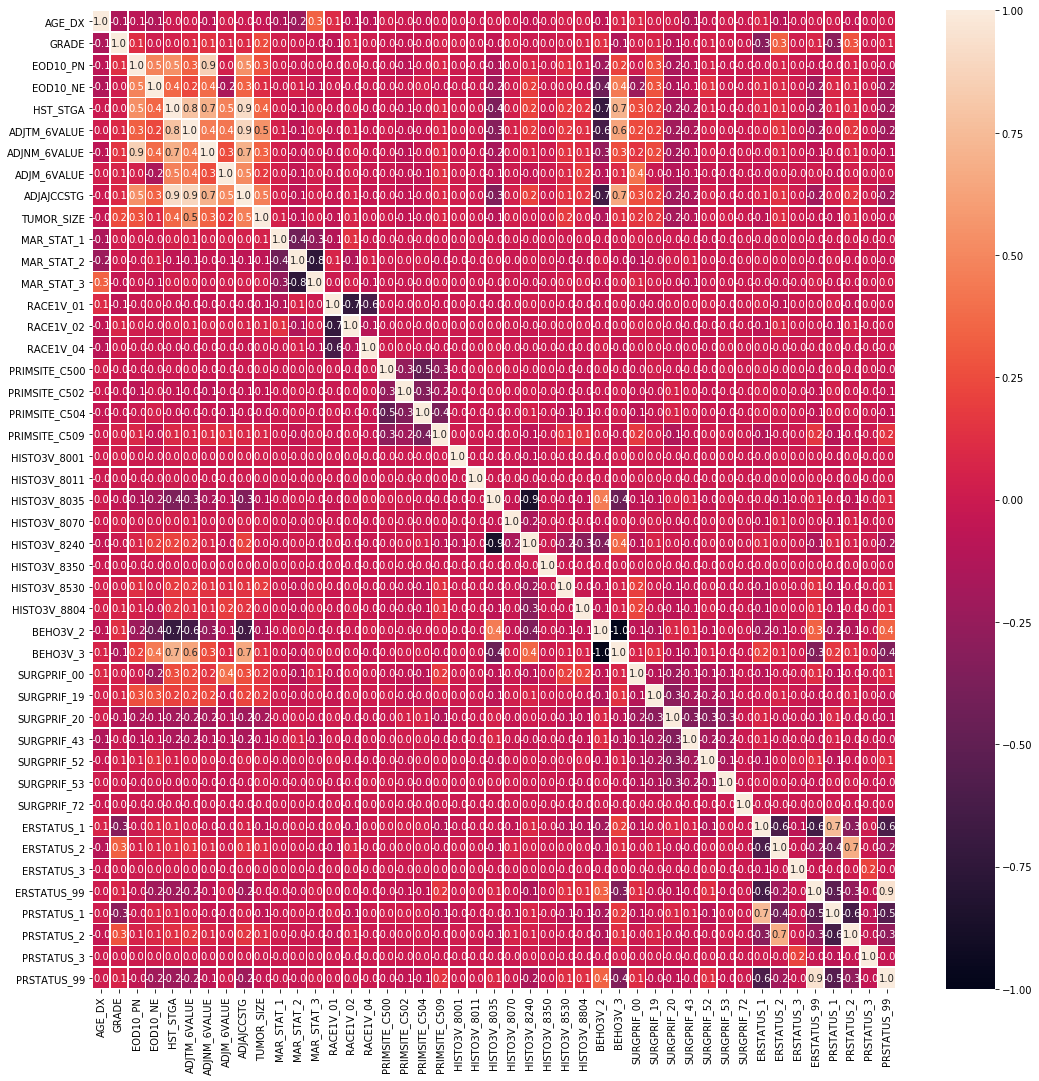

In [91]:
# Printing Final Correleation matrix
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataset1.drop(['SURV'], axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

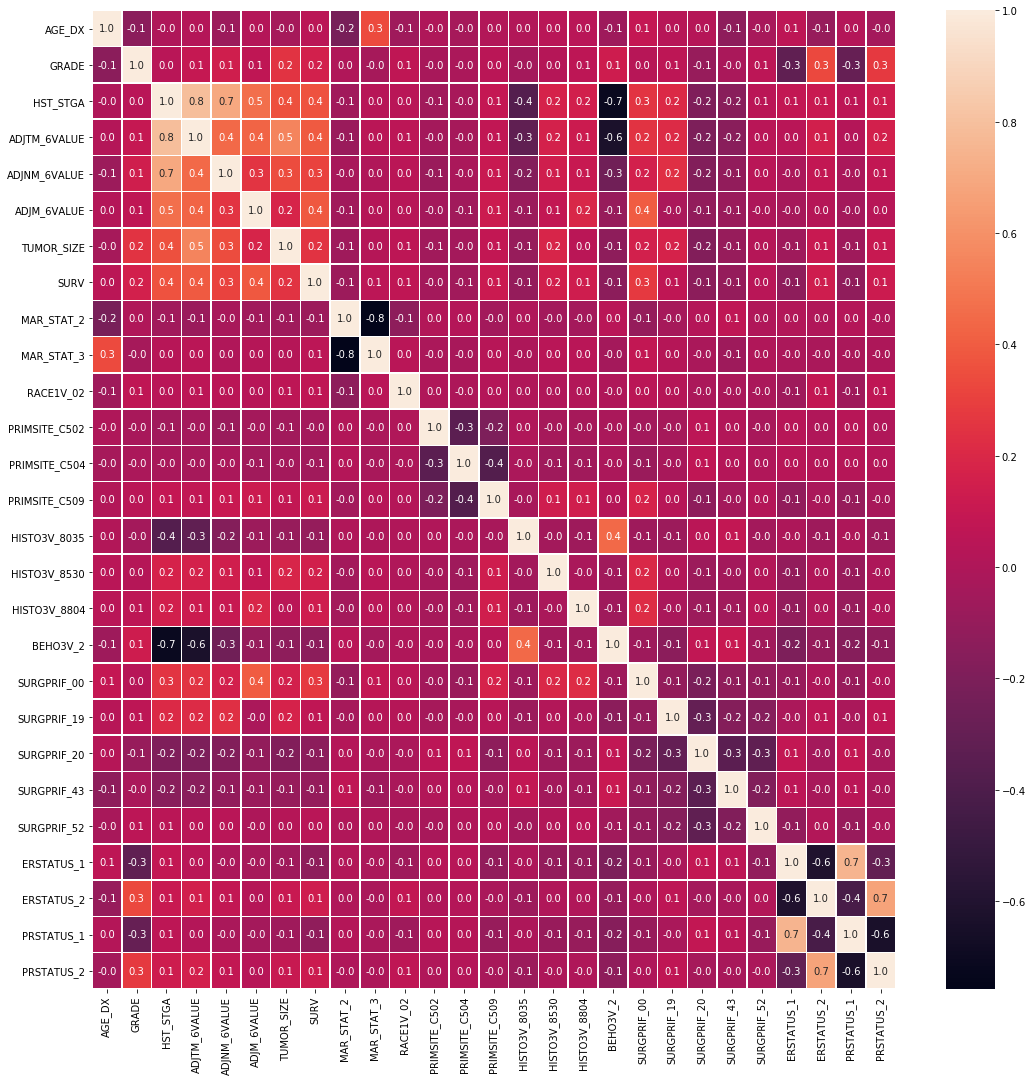

In [92]:
droplist = list(selected_features_chi2.reset_index().sort_values(by=0).iloc[:15,0])
droplist.extend(('EOD10_PN','ADJAJCCSTG','EOD10_NE','BEHO3V_3'))
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dataset1.drop(droplist, axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Baseline Model

In [93]:
# Function to split test and train data
def test_train_split(dataset):
    # Separate input features and target
    y = dataset.SURV
    x = dataset.drop('SURV', axis=1)
    # setting up testing and training sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)
    return x_train, x_test, y_train, y_test

In [94]:
# Function to print model results

def model_results(model,y_test, y_pred,x_test):
    #Confusion Matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10,9))
    fig.subplots_adjust(hspace=1.5, wspace=1.5)
    ax = plt.subplot(2,2,1)
    
    #Plotting Confusion Matrix
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g',ax=ax)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    # Plotting ROC curve
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test.astype('int'),  y_pred_proba)
    lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test.astype('int'),  y_pred_proba)
    pr_auc = metrics.auc(lr_recall, lr_precision)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    ax = plt.subplot(2,2,2)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    #Plotting Precision-Recall Curve
    plt.plot(lr_recall, lr_precision, label = "auc="+str(pr_auc))
    plt.legend(loc=4)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    
    #Printing Results
    print('Accuracy : ', (cnf_matrix[0,0]+cnf_matrix[1,1])/sum(sum(cnf_matrix)))
    print('Sensitivity : ', cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1]))
    print('Specificity : ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("G Mean Score: %.3f" %imetrics.geometric_mean_score(y_test, y_pred))
    print("Precision: %.3f" %metrics.precision_score(y_test, y_pred))
    print("Recall: %.3f" %metrics.recall_score(y_test, y_pred))
    print("F1 Score: %.3f" %metrics.f1_score(y_test, y_pred))
    print("ROC AUC: %.3f" %auc)
    print("Precision-Recall AUC: %.3f" %pr_auc)

### Logistic Regression

C:\Users\narra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


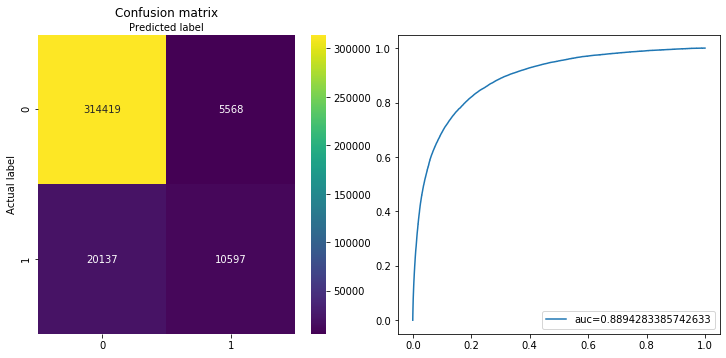

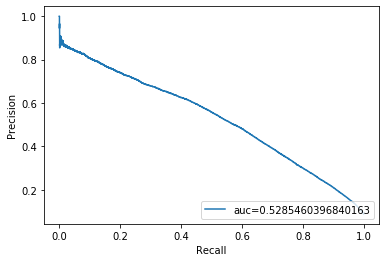

Accuracy :  0.9267081241214526
Sensitivity :  0.982599293096282
Specificity :  0.3447972929003709
G Mean Score: 0.582
Precision: 0.656
Recall: 0.345
F1 Score: 0.452
ROC AUC: 0.889
Precision-Recall AUC: 0.529


In [95]:
# Test-train split
x_train, x_test, y_train, y_test = test_train_split(dataset1)

# Fitting Logistic regression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

#Predictions
y_pred=logreg.predict(x_test)

# Printing results
model_results(logreg,y_test, y_pred,x_test)

### Logistic Regression with SMOTE

C:\Users\narra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


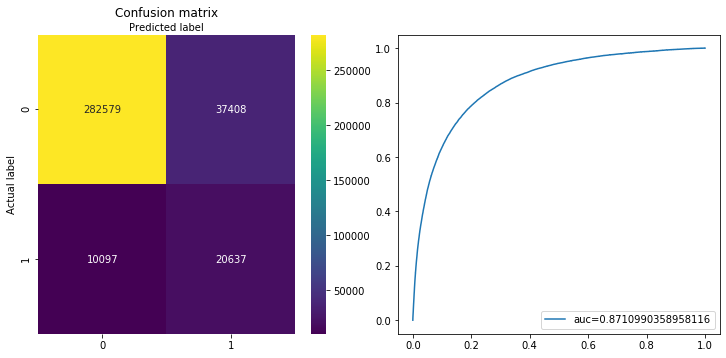

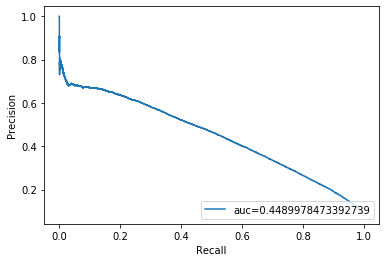

Accuracy :  0.8645504546348807
Sensitivity :  0.8830952507445615
Specificity :  0.6714713346782065
G Mean Score: 0.770
Precision: 0.356
Recall: 0.671
F1 Score: 0.465
ROC AUC: 0.871
Precision-Recall AUC: 0.449


In [96]:
# Test- train Split
x_train, x_test, y_train, y_test = test_train_split(dataset1)

# Appling SMOTE oversampling technique
smt = SMOTE(random_state=27)
x_train, y_train = smt.fit_sample(x_train, y_train)

# Fitting Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

# Predictions
y_pred=logreg.predict(x_test)

# Printing Results
model_results(logreg,y_test, y_pred,x_test)

### Logistic Regression with Oversampling and undersampling

C:\Users\narra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


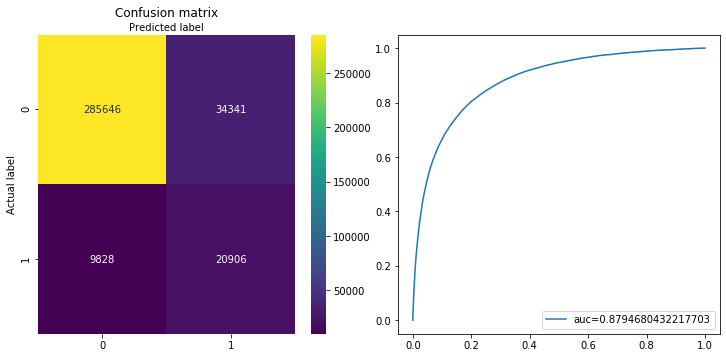

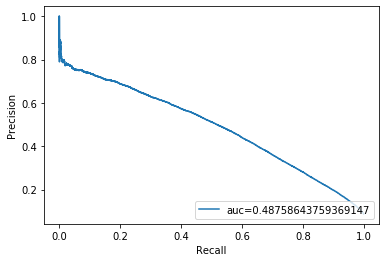

Accuracy :  0.8740622888278717
Sensitivity :  0.8926800151256145
Specificity :  0.6802238563154812
G Mean Score: 0.779
Precision: 0.378
Recall: 0.680
F1 Score: 0.486
ROC AUC: 0.879
Precision-Recall AUC: 0.488


In [97]:
# Test- train Split
x_train, x_test, y_train, y_test = test_train_split(dataset1)

#Over Sampling
over = SMOTE(sampling_strategy=0.5)

#Under Sampling
under = RandomUnderSampler(sampling_strategy=1.0)

#Defining Pipeline
steps = [('over', over),('under', under),('m', LogisticRegression())]
pipeline = Pipeline(steps=steps)
pipeline.fit(x_train,y_train)

# Predictions
y_pred=pipeline.predict(x_test)

# Printing Results
model_results(pipeline,y_test, y_pred,x_test)

### Logistic Regression after dropping chi2 columns

C:\Users\narra\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


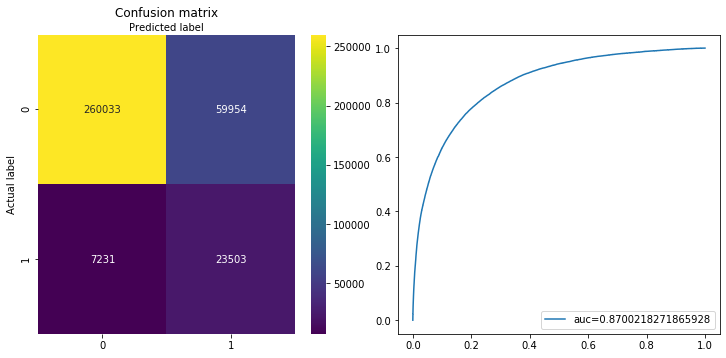

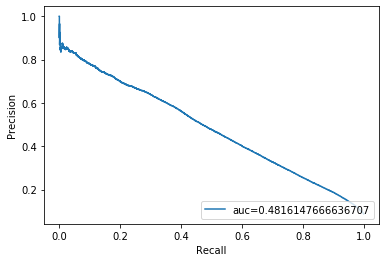

Accuracy :  0.8084374759424158
Sensitivity :  0.8126361383431202
Specificity :  0.7647231079586126
G Mean Score: 0.788
Precision: 0.282
Recall: 0.765
F1 Score: 0.412
ROC AUC: 0.870
Precision-Recall AUC: 0.482


In [98]:
# Defining drop list
## selecting top 15 nominal columns from Chi-squared test 
droplist = list(selected_features_chi2.reset_index().sort_values(by=0).iloc[:15,0])
droplist.extend(('EOD10_PN','ADJAJCCSTG','EOD10_NE','BEHO3V_3'))

model_dataset = dataset1.drop(droplist, axis=1)

#test-train split
x_train, x_test, y_train, y_test = test_train_split(model_dataset)

#Over Sampling
over = SMOTE(sampling_strategy=0.5)

#Under Sampling
under = RandomUnderSampler(sampling_strategy=1.0)

#Defining Pipeline
steps = [('over', over),('under', under),('m', LogisticRegression())]
pipeline = Pipeline(steps=steps)
pipeline.fit(x_train,y_train)

# Predictions
y_pred=pipeline.predict(x_test)

#Printing results
model_results(pipeline,y_test, y_pred,x_test)

# Principal component analysis (PCA)

>2 0.865 (0.001)
>3 0.871 (0.001)
>4 0.872 (0.001)
>5 0.877 (0.001)
>6 0.878 (0.001)
>7 0.879 (0.001)
>8 0.880 (0.001)
>9 0.880 (0.001)
>10 0.880 (0.001)
>11 0.880 (0.001)
>12 0.880 (0.001)
>13 0.880 (0.001)
>14 0.880 (0.001)


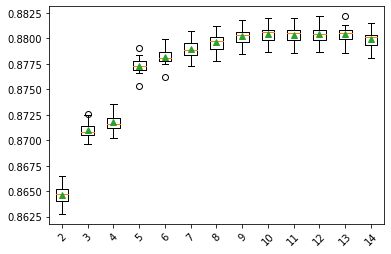

In [99]:
def get_dataset():
    droplist = list(selected_features_chi2.reset_index().sort_values(by=0).iloc[:15,0])
    droplist.extend(('EOD10_PN','ADJAJCCSTG','EOD10_NE','BEHO3V_3'))
    x_train, x_test, y_train, y_test = test_train_split(dataset1.drop(droplist, axis=1))
    X = x_train
    y = y_train
    return X, y

def get_models():
    over = SMOTE(sampling_strategy=0.5)
    under = RandomUnderSampler(sampling_strategy=1.0)
    models = dict()
    for i in range(2,15):
        steps = [('over', over), ('under', under),('pca', PCA(n_components=i)),('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

#  Preparing Data for Further Modelling

In [100]:
# Preparing a new dataset for modeling with transformed columns
droplist = list(selected_features_chi2.reset_index().sort_values(by=0).iloc[:15,0])
droplist.extend(('EOD10_PN','ADJAJCCSTG','EOD10_NE','BEHO3V_3'))

# Writing data into CSV
dataset1.drop(droplist, axis=1).to_csv (r'engineeredData.csv', index = False, header=True)


## Further analysis is done in "Data Mining" file